In [15]:
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
stdsc = StandardScaler()

In [5]:
data = pd.read_csv('input/train.csv').iloc[:,1:]
trues = data.loc[data['target'] == 1]
falses = data.loc[data['target'] != 1].sample(frac=1)[:len(trues)]

test_data = pd.read_csv('input/test.csv').iloc[:,1:]

std_sc = False

In [6]:
trues.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
13,1,16.3699,1.5934,16.7395,7.3330,12.1450,5.9004,4.8222,20.9729,1.1064,8.6978,2.3287,-11.3409,13.7999,2.7925,6.3182,14.7313,7.2594,-2.4759,14.3984,9.1793,16.8467,19.4258,1.6565,2.5107,7.1272,13.6444,-12.8761,-1.0136,5.1773,7.3507,-16.0042,6.4460,-3.3238,14.3372,10.9481,6.7386,-0.5110,4.4335,7.8621,0.9851,-2.7683,20.3226,11.6988,11.4962,6.9105,3.1540,16.8121,-16.4423,11.3112,10.3608,13.3774,28.1402,-7.2237,7.7886,4.1192,12.1580,16.3189,4.9590,8.5248,8.4103,7.4576,-21.2631,2.0528,-0.9234,7.0410,0.0356,6.2113,16.2506,5.0265,-5.2830,43.2469,0.7891,-4.6379,2.0563,34.3104,11.6237,18.8226,23.6974,5.1943,14.7594,-4.2354,12.1677,-8.1746,-5.0063,13.5283,20.7959,1.8496,8.2186,7.2955,0.3097,5.1511,7.0012,15.9338,10.1819,15.0883,0.4787,26.9915,6.6598,2.6128,-2.3490,3.0553,7.9854,23.1168,1.2800,10.3728,4.2077,6.9854,3.2922,14.1718,19.9806,7.3345,6.6171,3.4385,10.8491,2.8266,-3.6481,0.6314,13.8302,-2.5018,-2.3101,11.2664,11.7174,-0.4719,7.8367,3.9109,12.4349,11.9001,0.1655,-5.0549,17.7638,11.7535,0.4436,6.0714,6.7134,-1.1220,12.0274,32.1259,6.3593,-1.5168,1.4873,0.8073,13.7223,17.1869,11.3074,10.1656,0.8520,9.4301,-6.1274,3.8642,1.5096,17.0617,5.0138,5.3431,18.8845,7.4016,-1.7007,13.8201,-3.1054,18.1658,6.6379,32.5287,5.8451,4.9591,11.7805,-7.0936,11.8863,3.2597,-4.3478,7.5711,5.6656,3.5750,-8.6583,20.3131,-2.2723,15.7383,8.1730,-12.4963,15.1929,3.9751,8.5618,2.4566,9.3694,0.6942,11.9694,11.8982,0.6129,10.8123,-1.0803,11.9586,-0.5899,7.4002,7.4031,4.3989,4.0978,17.3638,-1.3022,9.6846,9.0419,15.6064,-10.8529
29,1,5.3301,-2.6064,13.1913,3.1193,6.6483,-6.5659,5.9064,15.2341,1.2915,9.1168,6.8278,1.3898,14.0957,12.3335,9.0616,14.8726,11.3542,5.2004,1.6610,24.3097,3.1983,13.0446,4.3067,2.1315,7.9501,13.9981,-12.6789,-0.7712,5.9889,2.1959,-16.2435,10.9816,-3.2509,7.8550,11.2951,14.3999,2.3497,6.4171,17.5473,-2.1249,-15.7092,7.6038,10.6423,11.2456,3.5497,14.5023,11.2144,-5.5329,8.1215,9.8182,13.7371,15.5106,-6.8440,5.7645,8.2102,6.0625,23.2816,7.1364,-2.7571,10.3222,8.8469,-7.0555,-1.5834,1.6658,6.9878,0.1353,4.3773,4.7981,5.0202,-5.1929,39.3510,0.5454,-0.0685,29.0933,23.0940,23.6232,7.0666,20.9167,3.1704,11.8957,-9.1243,15.2648,11.2055,3.6793,-6.4194,15.3155,6.8857,7.6681,11.0955,4.0139,-5.2911,6.9516,13.1476,10.0164,12.6318,-0.5166,17.4864,2.1070,2.0480,-1.9181,-18.6567,16.6038,28.9214,1.5178,11.2205,4.8288,12.4790,13.3789,13.9964,11.8464,9.6306,6.3321,5.9595,5.8135,3.9010,4.3564,1.8298,21.8669,9.3199,6.9396,18.2151,11.3680,-4.8909,-4.3503,4.9419,12.7444,13.2954,5.5083,-1.8983,

In [7]:
falses.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
33669,0,13.2131,0.3750,8.9478,7.9283,11.7001,1.8991,6.2072,14.2288,1.3855,6.7671,-8.2673,-10.2486,13.8886,14.2477,6.8018,14.2280,8.7080,-17.8709,7.4745,3.6766,10.4623,27.8878,3.6509,2.3312,7.8033,13.4749,-0.3209,-2.2798,6.0750,2.7760,-11.3877,10.4745,-0.7332,17.7414,12.0349,-3.6849,3.6215,9.5984,9.1538,-0.9305,0.4769,6.1403,10.3875,10.9217,9.4732,15.8551,7.8859,-17.6376,8.1439,21.0718,12.1313,-4.0694,1.8098,5.6114,-0.0676,15.8095,20.2921,5.8615,-3.6358,9.7284,15.9962,-3.7550,-1.1276,-3.1864,5.7711,0.4355,5.8970,21.5655,5.0236,-2.8930,29.9884,0.1635,6.8151,17.4894,19.7060,23.1966,1.8423,18.3090,1.8543,12.6337,0.3355,16.4056,5.6484,10.6047,-2.4109,19.8253,-3.5484,10.6057,8.2557,4.3756,-42.0207,6.9996,17.3636,10.5439,13.3245,-0.5450,20.9381,25.6963,2.5741,1.3946,-17.3220,15.3213,23.3145,1.4925,10.2121,3.3895,8.3617,25.1607,14.3744,16.3399,3.5370,4.6732,4.4464,14.5019,2.6337,0.3677,3.4895,5.4162,-17.9931,8.7533,20.3004,13.8149,-0.8421,7.6649,1.6306,12.5420,12.7999,1.7662,-3.8694,15.3553,10.8804,0.9739,4.2143,6.3003,-2.9858,-2.9189,31.2541,10.6858,-5.9832,1.0471,-2.5053,-13.9348,0.9099,16.5862,7.8563,10.4254,7.3804,-4.6166,4.1777,1.6516,19.6565,13.5357,9.6469,14.0153,11.9930,-10.2557,13.3449,4.1776,16.5723,8.0351,17.3796,5.9821,7.8614,11.1804,2.9060,29.5970,2.5214,-0.9827,10.2961,5.3929,1.5522,1.8580,11.8095,1.9824,26.0949,9.8970,-9.6744,10.7223,15.4436,6.1014,1.1116,10.9815,0.9166,16.5851,23.3014,0.8086,10.8934,0.0797,11.2959,-0.2286,2.7097,3.6387,0.4322,5.6995,19.4894,-0.6604,0.6512,10.2339,18.1678,-5.8163
61146,0,8.3354,-5.2095,11.7034,4.2839,11.0797,-5.8086,5.6464,18.3748,2.0783,7.7363,-0.3039,-9.5299,13.5540,11.3339,6.3175,14.4914,7.6189,-11.1806,33.8409,16.6450,11.3060,38.9487,1.5515,2.7431,4.1831,14.0278,-6.7012,-2.1648,6.4560,10.7146,-10.1672,11.7278,-3.6222,20.1918,11.6968,-0.6524,-0.2074,5.4510,14.0928,-1.3113,-14.6275,3.7211,11.4262,11.8861,10.1561,-13.6667,12.0184,-10.2882,-3.4390,10.1711,12.4041,11.8071,-1.2922,6.2901,-8.0057,11.2550,22.1529,6.0257,-0.9363,8.7417,9.6816,-20.4827,1.1641,3.3779,6.9110,-6.7176,5.9654,11.0592,5.0148,-10.0159,12.9088,0.9292,-5.8348,18.6823,5.3499,23.4376,14.5361,13.0043,4.9054,14.3492,14.4269,18.4167,2.6421,5.0556,-3.7734,25.6825,-2.8293,2.7897,9.8533,3.8985,-34.6799,7.3410,9.2565,10.9247,8.1010,-0.1155,9.0665,14.3739,2.5997,-1.9579,-16.2700,6.6506,23.0561,1.6706,14.5274,4.6768,9.1234,30.0580,14.4560,13.7433,9.9319,6.0770,1.1148,5.4926,1.9857,-0.3595,4.0044,30.5317,1.9856,3.3283,21.9281,12.1579,-5.3634,-1.9537,10.0076,12.

In [8]:
trues.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,20098.0,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.00000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.

In [9]:
falses.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,20098.0,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098

In [13]:
t_1 = trues.iloc[1,:]

In [19]:
t_1.values

array([  1.    ,   5.3301,  -2.6064,  13.1913,   3.1193,   6.6483,
        -6.5659,   5.9064,  15.2341,   1.2915,   9.1168,   6.8278,
         1.3898,  14.0957,  12.3335,   9.0616,  14.8726,  11.3542,
         5.2004,   1.661 ,  24.3097,   3.1983,  13.0446,   4.3067,
         2.1315,   7.9501,  13.9981, -12.6789,  -0.7712,   5.9889,
         2.1959, -16.2435,  10.9816,  -3.2509,   7.855 ,  11.2951,
        14.3999,   2.3497,   6.4171,  17.5473,  -2.1249, -15.7092,
         7.6038,  10.6423,  11.2456,   3.5497,  14.5023,  11.2144,
        -5.5329,   8.1215,   9.8182,  13.7371,  15.5106,  -6.844 ,
         5.7645,   8.2102,   6.0625,  23.2816,   7.1364,  -2.7571,
        10.3222,   8.8469,  -7.0555,  -1.5834,   1.6658,   6.9878,
         0.1353,   4.3773,   4.7981,   5.0202,  -5.1929,  39.351 ,
         0.5454,  -0.0685,  29.0933,  23.094 ,  23.6232,   7.0666,
        20.9167,   3.1704,  11.8957,  -9.1243,  15.2648,  11.2055,
         3.6793,  -6.4194,  15.3155,   6.8857,   7.6681,  11.0

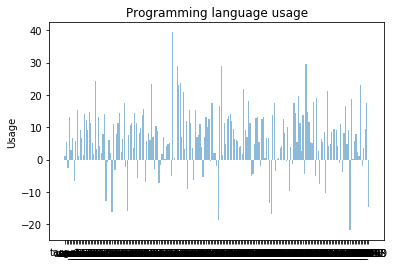

In [23]:
objects = list(trues.columns.values)
y_pos = np.arange(len(objects))
performance = t_1.values
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()